In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Input, BatchNormalization, ZeroPadding2D
import keras
from tensorflow import keras
from keras import regularizers

In [3]:
from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array 
from keras import regularizers
from keras import optimizers
from keras.models import load_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from PIL import ImageFile

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.4.0'

In [6]:
my_data_dir = 'C:\\Users\\akumar5\\Documents\\Python Bootcamp\\cassava-leaf-disease-classification\\train_test_split'

In [7]:
# CONFIRM THAT THIS REPORTS BACK 'test' and 'train'
os.listdir(my_data_dir)

['test', 'train']

In [8]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [9]:
os.listdir(test_path)

['0', '1', '2', '3', '4']

In [10]:
os.listdir(train_path)

['0', '1', '2', '3', '4']

In [11]:
os.listdir(train_path+'\\0')[0]

'1000015157.jpg'

In [12]:
para_cell = train_path+'\\0'+'\\1000015157.jpg'

In [13]:
para_img= imread(para_cell)

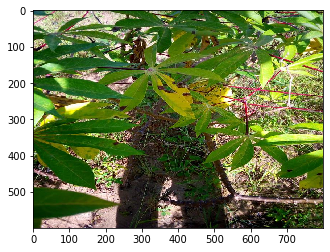

In [14]:
plt.imshow(para_img)

In [15]:
para_img.shape

(600, 800, 3)

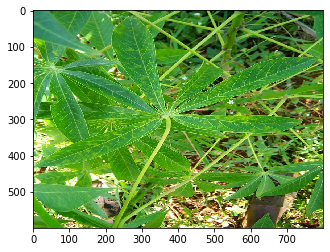

In [16]:
unifected_cell_path = train_path+'\\1\\'+os.listdir(train_path+'\\1')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [17]:
unifected_cell.shape

(600, 800, 3)

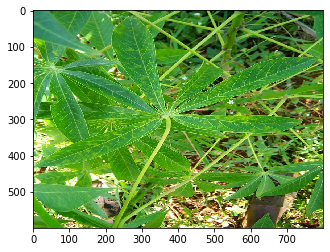

In [18]:
unifected_cell_path = train_path+'\\1\\'+os.listdir(train_path+'\\1')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

**Let's check how many images there are.**

In [19]:
len(os.listdir(train_path+'\\0'))

869

In [20]:
len(os.listdir(train_path+'\\1'))

1751

In [21]:
len(os.listdir(train_path+'\\2'))

1908

In [25]:
len(os.listdir(train_path+'\\3'))

10526

In [24]:
for img in os.listdir('C:\\Users\\akumar5\\Documents\\Python Bootcamp\\cassava-leaf-disease-classification\\label_3_split'):
    src = 'C:\\Users\\akumar5\\Documents\\Python Bootcamp\\cassava-leaf-disease-classification\\label_3_split\\'+img
    dst = 'C:\\Users\\akumar5\\Documents\\Python Bootcamp\\cassava-leaf-disease-classification\\train_test_split\\train\\3'
    shutil.move(src, dst)

In [24]:
len(os.listdir(train_path+'\\3'))

2000

In [23]:
len(os.listdir(train_path+'\\4'))

2061

**Let's find out the average dimensions of these images.**

In [26]:
unifected_cell.shape

(600, 800, 3)

In [27]:
para_img.shape

(600, 800, 3)

In [ ]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

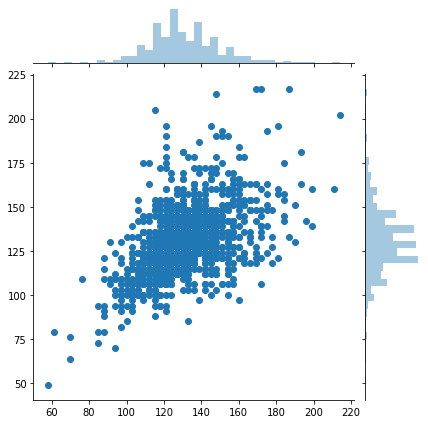

In [38]:
sns.jointplot(dim1,dim2)

In [40]:
np.mean(dim1)

130.92538461538462

In [41]:
np.mean(dim2)

130.75

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 5%
                               height_shift_range=0.2, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               #shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               #zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               vertical_flip=True
                               #fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

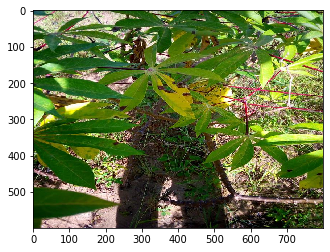

In [30]:
plt.imshow(para_img)

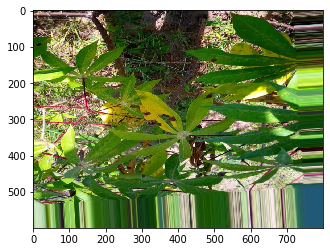

In [31]:
plt.imshow(image_gen.random_transform(para_img))

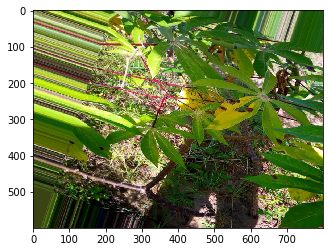

In [32]:
plt.imshow(image_gen.random_transform(para_img))

In [33]:
image_gen.flow_from_directory(train_path)

Found 17115 images belonging to 5 classes.


In [34]:
image_gen.flow_from_directory(test_path)

Found 4282 images belonging to 5 classes.


# Creating the Model

In [35]:
image_shape = (256,256,3)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Input, BatchNormalization, ZeroPadding2D
import keras
from tensorflow import keras
from keras import regularizers

In [48]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.2))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 598, 798, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 299, 399, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 297, 397, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 148, 198, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 196, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 98, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 96, 256)      

## Early Stopping

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss',patience=2, verbose=1)

## Training the Model

In [46]:
batch_size = 32

In [47]:
image_shape = (600,800,3)

In [50]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 17115 images belonging to 5 classes.


In [51]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 4282 images belonging to 5 classes.


In [52]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
535/535 [==============================] - 13363s 25s/step - loss: 1.5185 - accuracy: 0.6012 - val_loss: 1.0986 - val_accuracy: 0.6200
Epoch 2/20
535/535 [==============================] - 13622s 25s/step - loss: 1.0859 - accuracy: 0.6139 - val_loss: 0.9934 - val_accuracy: 0.6345
Epoch 3/20
301/535 [===============>..............] - ETA: 1:28:16 - loss: 0.9818 - accuracy: 0.6387

In [88]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

# Evaluating the Model

In [89]:
losses = pd.DataFrame(model.history.history)

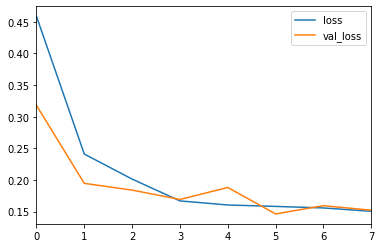

In [90]:
losses[['loss','val_loss']].plot()

In [91]:
model.metrics_names

['loss', 'accuracy']

In [114]:
model.evaluate_generator(test_image_gen)

[0.14881458843521134, 0.94884616]

In [97]:
from tensorflow.keras.preprocessing import image

In [115]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [116]:
pred_probabilities

array([[2.2703409e-04],
       [2.1749735e-04],
       [5.4228306e-04],
       ...,
       [9.7448182e-01],
       [9.7615612e-01],
       [9.6059412e-01]], dtype=float32)

In [117]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [118]:
predictions = pred_probabilities > 0.5

In [119]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [122]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1220,   80],
       [  46, 1254]], dtype=int64)

# Predicting on an Image

In [124]:
# Your file path will be different!
para_cell

'C:\\Users\\Marcial\\Pierian-Data-Courses\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [132]:
my_image = image.load_img(para_cell,target_size=image_shape)

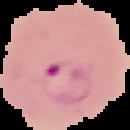

In [137]:
my_image

In [138]:
type(my_image)

PIL.Image.Image

In [139]:
my_image = image.img_to_array(my_image)

In [142]:
type(my_image)

numpy.ndarray

In [143]:
my_image.shape

(130, 130, 3)

In [144]:
my_image = np.expand_dims(my_image, axis=0)

In [145]:
my_image.shape

(1, 130, 130, 3)

In [146]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [147]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [148]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

# Great Job!